In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('MLH December 2022 Dataset.csv', encoding='cp1252')
df.head(5)

C:\Users\rajan\AppData\Local\Temp\ipykernel_8868\3101355438.py:1: DtypeWarning: Columns (32,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MLH December 2022 Dataset.csv', encoding='cp1252')


,caseID,Case No,CaseTypeID,Case Type,Status,Atty Id,Attorney,Law Firm ID,Law Firm,Client,...,Weight for Signal IRR,Signal MOIC,Signal IRR,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91
0,5446.0,ML6446,1.0,Core,Closed-Settled,3011.0,"Brannon, Paul",6167.0,Brannon & Brannon,"Zylak, William",...,"$2,967.90",2.08x,1000.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26897.0,ML27897,1.0,Core,Active-Pending Settlement,1736.0,"Spaulding, Theodore",8049.0,"Spaulding Law, LLC","Zwak, Tracy",...,$0.00,0.00x,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26897.0,ML27897,1.0,Core,Active-Pending Settlement,1736.0,"Spaulding, Theodore",8049.0,"Spaulding Law, LLC","Zwak, Tracy",...,$0.00,0.00x,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26897.0,ML27897,1.0,Core,Active-Pending Settlement,1736.0,"Spaulding, Theodore",8049.0,"Spaulding Law, LLC","Zwak, Tracy",...,$0.00,0.00x,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26897.0,ML27897,1.0,Core,Active-Pending Settlement,1736.0,"Spaulding, Theodore",8049.0,"Spaulding Law, LLC","Zwak, Tracy",...,$0.00,0.00x,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop Redundant Columns
columns_to_drop = [85, 86, 87, 88, 89, 90, 91]

df.drop(df.columns[columns_to_drop], axis=1, inplace=True)

# Convert columns to datetime, coercing errors
date_columns = [
    'Intake Date', 'Case Settlement Date', 'MLO Payment Date', 
    'QB Trans. Date', 'Treatment Date', 'Loan Date', 'Orig. Loan Date', 
    'Settlement Payment Date', 'Report Date (beginning of Month)', 
    '1st Anniversary Interest Date', '2nd Anniversary Interest Date', 
    'Case Settlement Date.1', 'Original Paid Date for XIRR Calc', 'Settlement Date for XIRR Calc',
    'Signal Paid Date for XIRR Calc', 'Settlement Date for Signal XIRR Calc'
    ]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

C:\Users\rajan\AppData\Local\Temp\ipykernel_8868\2664573404.py:17: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\rajan\AppData\Local\Temp\ipykernel_8868\2664573404.py:17: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\rajan\AppData\Local\Temp\ipykernel_8868\2664573404.py:17: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\rajan\AppData\Local\Temp\ipykernel_8868\2664573404.py:17: Use

In [5]:
# Convert interest rates to decimals, coercing errors

percentage_columns= ['Year 1 Interest Rate', 'Year 2 Interest Rate', 'Year 3+ Interest Rate', 
                     'Interest Rate for Signal Initial', 'Original IRR', 'Signal IRR'
                    ]
for col in percentage_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.rstrip('%')
        df[col] = pd.to_numeric(df[col], errors='coerce') / 100.0

df.head(20)

,caseID,Case No,CaseTypeID,Case Type,Status,Atty Id,Attorney,Law Firm ID,Law Firm,Client,...,Original MOIC,Original IRR,Signal Adjusted Amount Paid for XIRR Calc,Signal Settlement Amount for XIRR Calc,Signal Paid Date for XIRR Calc,Settlement Date for Signal XIRR Calc,Weight for Signal MOIC,Weight for Signal IRR,Signal MOIC,Signal IRR
0,5446.0,ML6446,1.0,Core,Closed-Settled,3011.0,"Brannon, Paul",6167.0,Brannon & Brannon,"Zylak, William",...,2.08x,10.000,$(296.79),$618.30,2015-04-14,2015-06-27,$618.30,"$2,967.90",2.08x,10.000
1,26897.0,ML27897,1.0,Core,Active-Pending Settlement,1736.0,"Spaulding, Theodore",8049.0,"Spaulding Law, LLC","Zwak, Tracy",...,0.00x,NaN,$(95.85),$-,2021-08-18,NaT,$0.00,$0.00,0.00x,NaN
2,26897.0,ML27897,1.0,Core,Active-Pending Settlement,1736.0,"Spaulding, Theodore",8049.0,"Spaulding Law, LLC","Zwak, Tracy",...,0.00x,NaN,"$(1,051.65)",$-,2021-07-28,NaT,$0.00,$0.00,0.00x,NaN
3,26897.0,ML27897,1.0,Core,Active-Pending Settlement,1736.0,"Spaulding, Theodore",8049.0,"Spaulding Law, LLC","Zwak, Tracy",...,0.00x,NaN,"$(1,098.45)",$-,2021-07-28,NaT,$0.00,$0.00,0.00x,NaN
4,26897.0,ML27897,1.0,Core,Active-Pending Settlement,1736.0,"Spaulding, Theodore",8049.0,"Spaulding Law, LLC","Zwak, Tracy",...,0.00x,NaN,$(233.10),$-,2021-05-20,NaT,$0.00,$0.00,0.00x,NaN
5,26897.0,ML27897,1.0,Core,Active-Pending Settlement,1736.0,"Spaulding, Theodore",8049.0,"Spaulding Law, LLC","Zwak, Tracy",...,0.00x,NaN,$(111.60),$-,2021-05-20,NaT,$0.00,$0.00,0.00x,NaN
6,26897.0,ML27897,1.0,Core,Active-Pending Settlement,1736.0,"Spaulding, Theodore",8049.0,"Spaulding Law, LLC","Zwak, Tracy",...,0.00x,NaN,$(81.45),$-,2021-05-20,NaT,$0.00,$0.00,0.00x,NaN
7,26897.0,ML27897,1.0,Core,Active-Pending Settlement,1736.0,"Spaulding, Theodore",8049.0,"Spaulding Law, LLC","Zwak, Tracy",...,0.00x,NaN,$(74.25),$-,2021-05-20,NaT,$0.00,$0.00,0.00x,NaN
8,26897.0,ML27897,1.0,Core,Active-Pending Settlement,1736.0,"Spaulding, Theodore",8049.0,"Spaulding Law, LLC","Zwak, Tracy",...,0.00x,NaN,$(112.50),$-,2021-05-20,NaT,$0.00,$0.00,0.00x,NaN
9,26897.0,ML27897,1.0,Core,Active-Pending Settlement,1736.0,"Spaulding, Theodore",8049.0,"Spaulding Law, LLC","Zwak, Tracy",...,0.00x,NaN,$(87.30),$-,2021-05-20,NaT,$0.00,$0.00,0.00x,NaN


In [6]:
# Remove Currency stamp and turn the value to a float
currency_col = ['Weight for Signal IRR', 'Weight for Signal MOIC', 'Signal Settlement Amount for XIRR Calc', 
                'Signal Adjusted Amount Paid for XIRR Calc', 'Weight for Orignal IRR', 'Weight for Original MOIC',
                'Settlement Amount for XIRR Calc', 'Adjusted Amount Paid for XIRR Calc', 'Amount Due to Signal MLH',
               '"Signal Funding" Interest Owed to Signal', '"Signal Initial" Interest Owed to Signal', 
                '"FPA" Interest Owed to Signal', 'Principal to Signal', 'Gross Profit',' Settlement for Payment',
               ' Settlement Payment ','Signal Collateral Amt', 'Amount Paid']
for col in currency_col:
    if col in df.columns:
        df[col] = df[col].replace({'\$': '', ',': '','-': '', '\(': '', '\)': ''}, regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')



In [7]:
# Remove leverage notation and turn to float value.

multiplier_cols = ['Signal MOIC','Original MOIC']

for col in multiplier_cols:
    if col in df.columns:
        df[col] = df[col].replace({'x': ''}, regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
#Drop Redundant Columns

cols_to_drop = ['caseID', 'Case No', 'CaseTypeID', 'Atty Id', 'Law Firm ID','ProviderID','BillID', 'BillItemID',
                'CPT Code/Description', 'TransactionOwnerID', 'PaymentID', 'PayeeID', 'Payment PayeeID', 'SettlementPaymentID',
               'Secondary Carrier']

df = df.drop(columns = cols_to_drop)

In [9]:
df['Reserve Amount'] = df['Reserve Amount'].replace({'\$': '', ',': '','-': '', '\(': '', '\)': ''}, regex=True)
df['Reserve Amount'] = df['Reserve Amount'].replace(' FALSE ', '0')
df['Reserve Amount'] = df['Reserve Amount'].replace('FALSE', '0')
df['Reserve Amount'] = df['Reserve Amount'].replace('    ', '0')
df['Reserve Amount'] = df['Reserve Amount'].astype(float)

In [10]:
df['Total Billed for Trtmt'] = df['Total Billed for Trtmt'].replace({'\$': '', ',': '','-': '', '\(': '', '\)': ''}, regex=True)
df['Total Billed for Trtmt'] = df['Total Billed for Trtmt'].replace(' FALSE ', '0')
df['Total Billed for Trtmt'] = df['Total Billed for Trtmt'].replace('FALSE', '0')
df['Total Billed for Trtmt'] = df['Total Billed for Trtmt'].replace('    ', '0')
df['Total Billed for Trtmt'] = df['Total Billed for Trtmt'].astype(float)

In [11]:
df[' Settlement for Payment '] = df[' Settlement for Payment '].replace({'\$': '', ',': '','-': '', '\(': '', '\)': ''}, regex=True)
df[' Settlement for Payment '] = df[' Settlement for Payment '].replace(' FALSE ', '0')
df[' Settlement for Payment '] = df[' Settlement for Payment '].replace('FALSE', '0')
df[' Settlement for Payment '] = df[' Settlement for Payment '].replace('    ', '0')
df[' Settlement for Payment '] = df[' Settlement for Payment '].astype(float)

In [12]:
df[' Settlement Payment '] = df[' Settlement Payment '].replace({'\$': '', ',': '','-': '', '\(': '', '\)': ''}, regex=True)
df[' Settlement Payment '] = df[' Settlement Payment '].replace(' FALSE ', '0')
df[' Settlement Payment '] = df[' Settlement Payment '].replace('FALSE', '0')
df[' Settlement Payment '] = df[' Settlement Payment '].replace('    ', '0')
df[' Settlement Payment '] = df[' Settlement Payment '].astype(float)

In [13]:
condition = df['Receivable Status'] == 'Settled'

# Create two new DataFrames based on the condition
df_closed = df[condition]
df_open = df[~condition]

In [14]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)  # Display full column width

In [15]:
numerical_columns = ['Total Billed for Trtmt', 'Amount Paid', ' Settlement Payment ', 'Gross Profit']

# Calculate and print basic statistics
for column in numerical_columns:
    mean = df[column].mean()
    median = df[column].median()
    std_dev = df[column].std()
    print(f'{column} - Mean: {mean}, Median: {median}, Standard Deviation: {std_dev}')

Total Billed for Trtmt - Mean: 1500.9902933932967, Median: 370.0, Standard Deviation: 6621.386353960628
Amount Paid - Mean: 270.13435747656956, Median: 65.0, Standard Deviation: 1469.0717370026355
 Settlement Payment  - Mean: 29508.575267827902, Median: 8000.0, Standard Deviation: 61059.51121264843
Gross Profit - Mean: 438.6451939897552, Median: 88.22, Standard Deviation: 2744.6689399988463


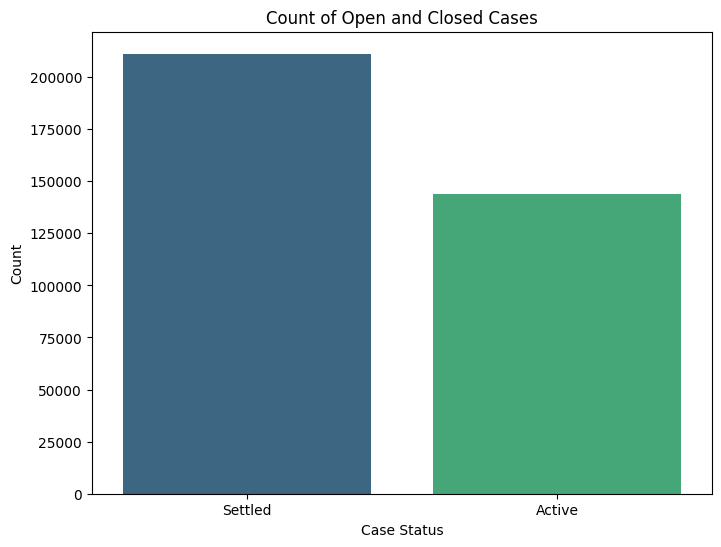

In [16]:
# Create a count plot for 'Case Status'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Receivable Status', palette='viridis')
plt.title('Count of Open and Closed Cases')
plt.xlabel('Case Status')
plt.ylabel('Count')
plt.show()

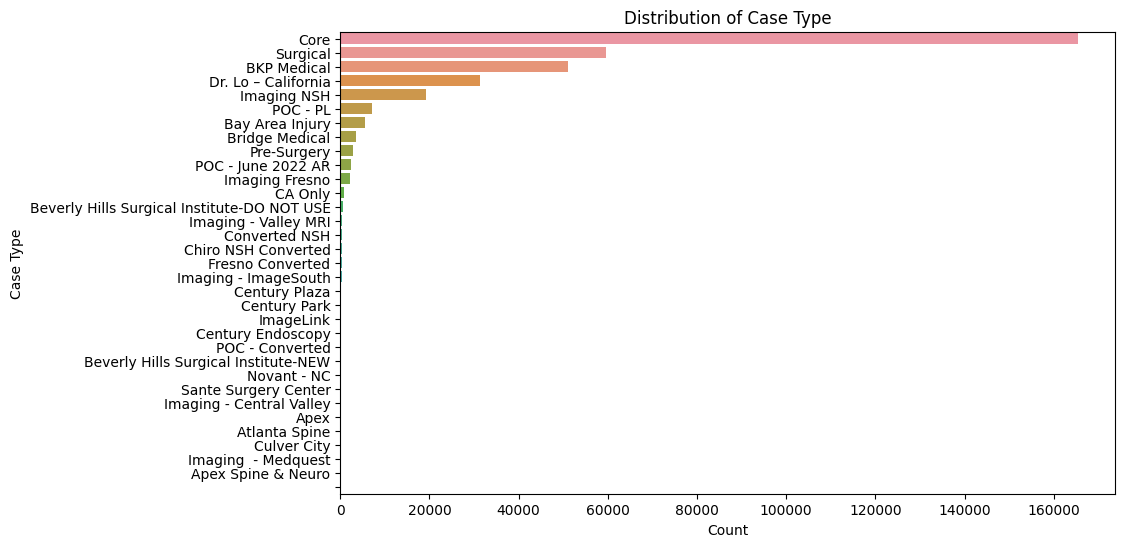

In [17]:
# Plot distribution for 'Case Type'
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Case Type'], order=df['Case Type'].value_counts().index)
plt.title('Distribution of Case Type')
plt.xlabel('Count')
plt.ylabel('Case Type')
plt.show()

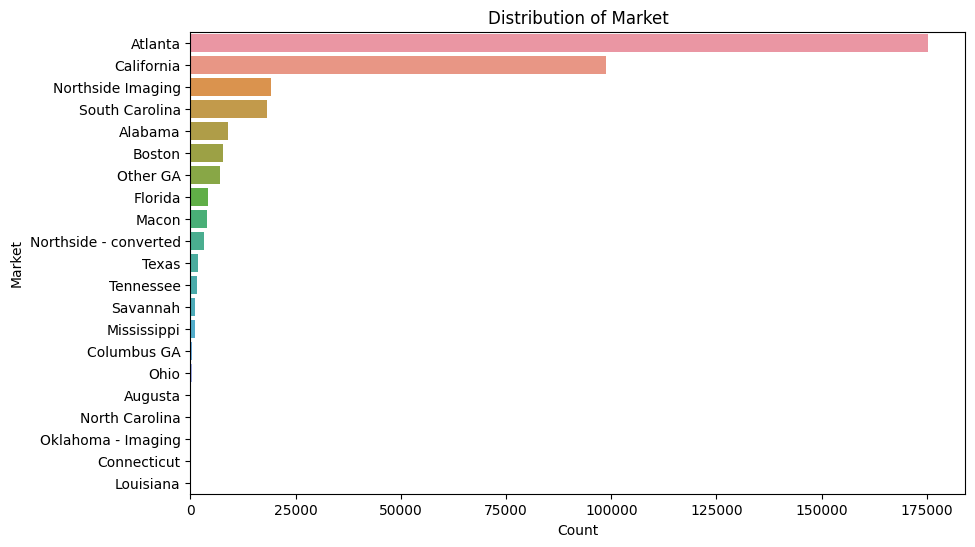

In [18]:
# Plot distribution for 'Market'
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Market'], order=df['Market'].value_counts().index)
plt.title('Distribution of Market')
plt.xlabel('Count')
plt.ylabel('Market')
plt.show()

C:\Users\rajan\AppData\Local\Temp\ipykernel_8868\1593607714.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log1p(df[column]).dropna(), shade=True)


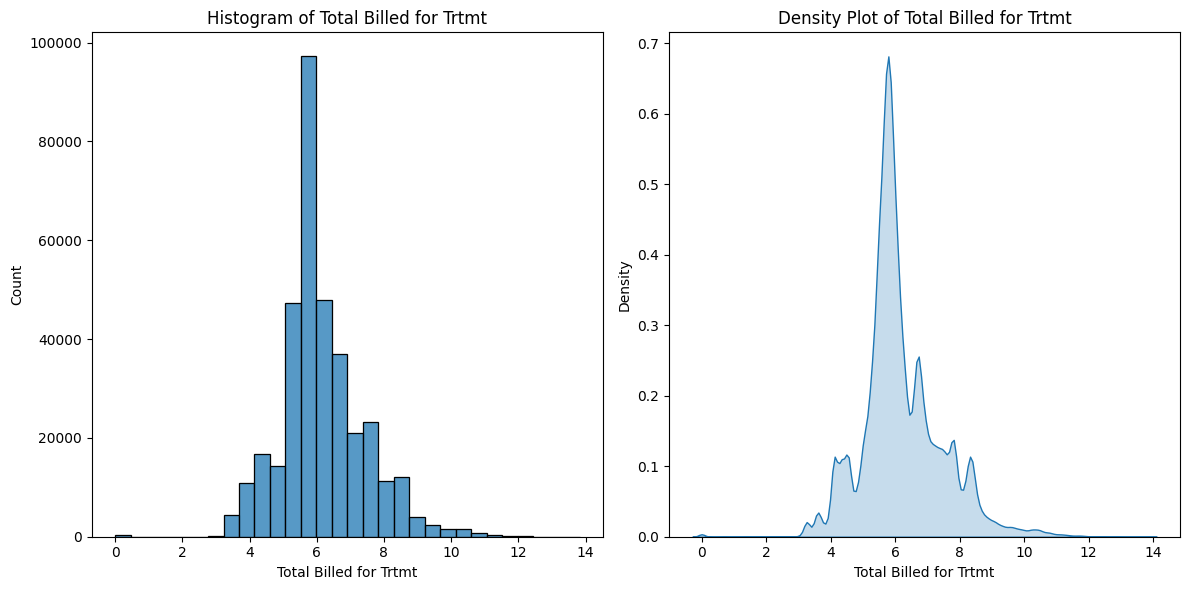

C:\Users\rajan\AppData\Local\Temp\ipykernel_8868\1593607714.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log1p(df[column]).dropna(), shade=True)


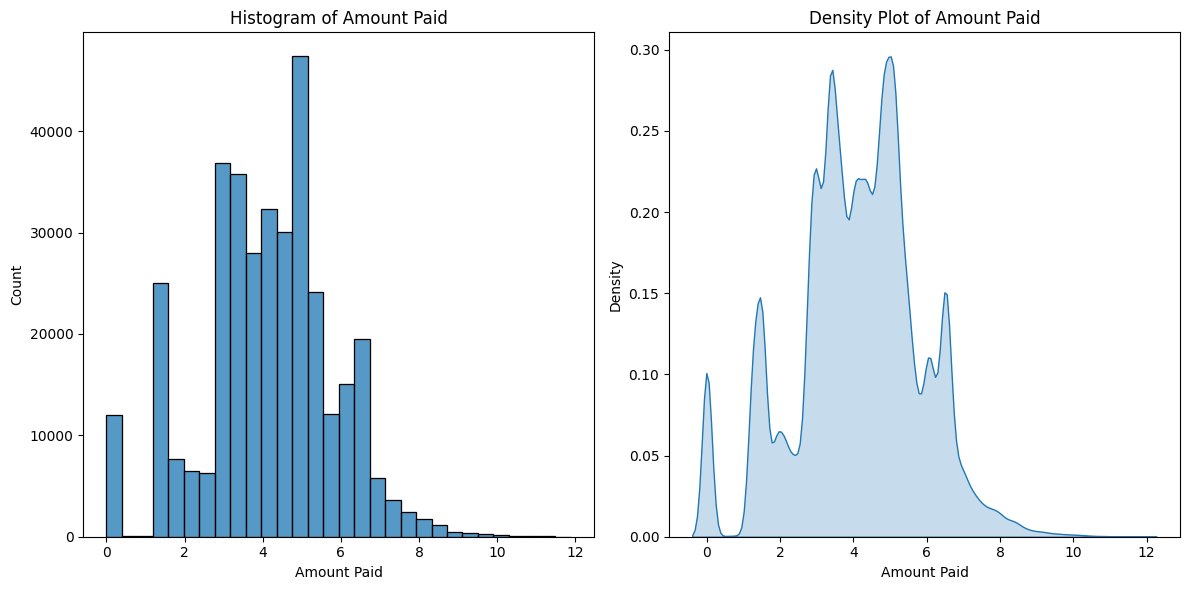

C:\Users\rajan\AppData\Local\Temp\ipykernel_8868\1593607714.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log1p(df[column]).dropna(), shade=True)


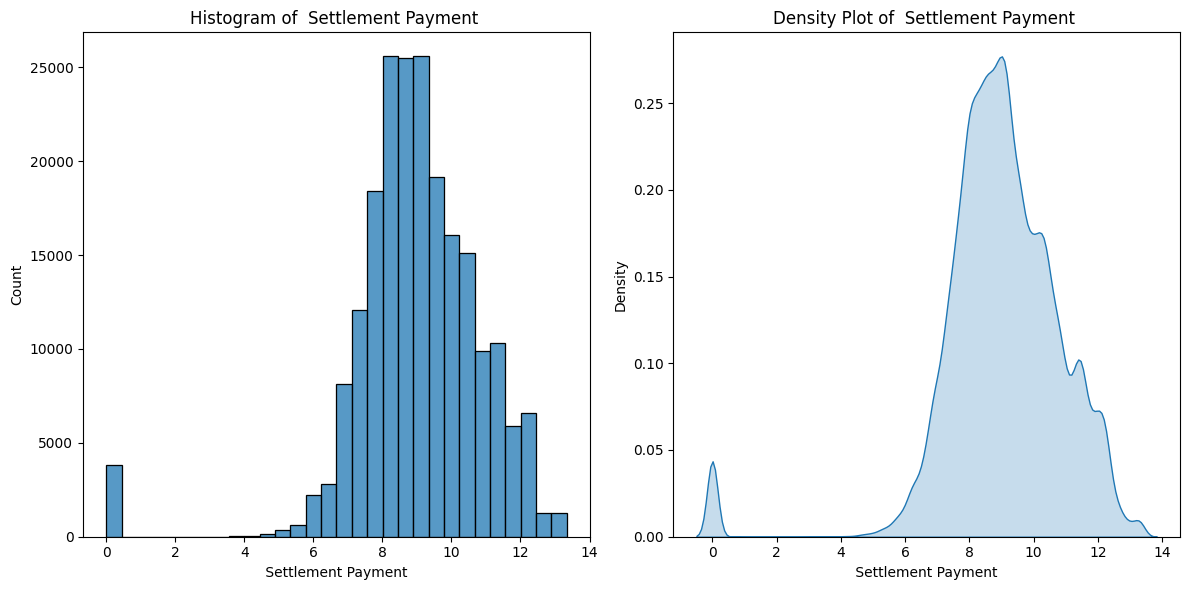

C:\Users\rajan\AppData\Local\Temp\ipykernel_8868\1593607714.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log1p(df[column]).dropna(), shade=True)


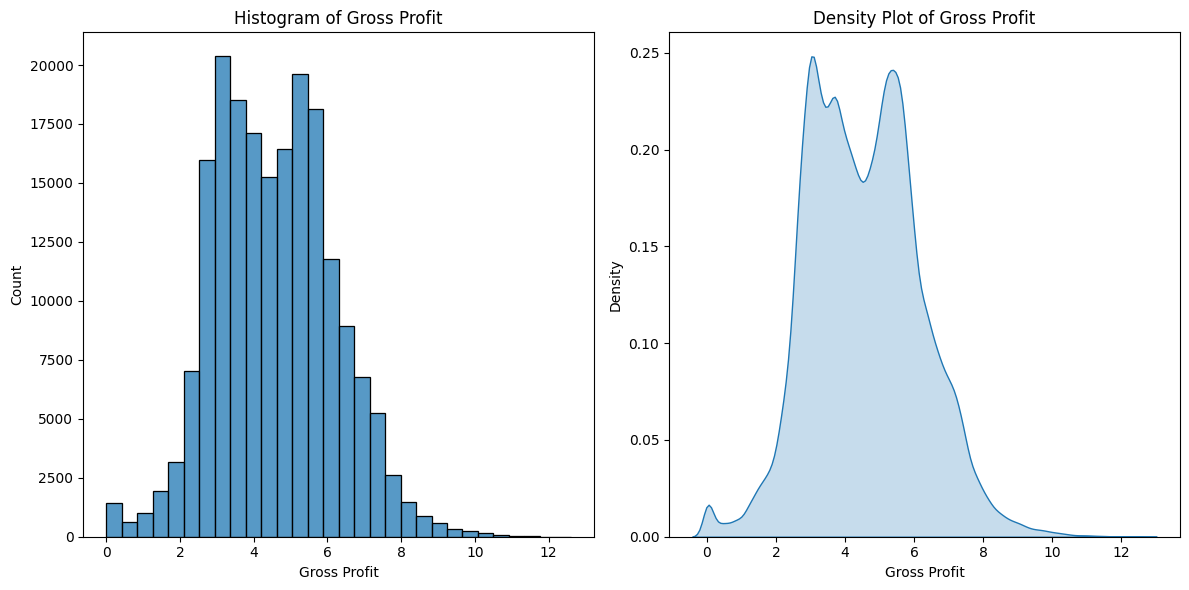

In [19]:
numerical_columns = ['Total Billed for Trtmt', 'Amount Paid', ' Settlement Payment ', 'Gross Profit']

def plot_distribution(columns):
    for column in columns:
        plt.figure(figsize=(12, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(np.log1p(df[column]).dropna(), bins=30, kde=False)
        plt.title(f'Histogram of {column}')
        
        # Density Plot
        plt.subplot(1, 2, 2)
        sns.kdeplot(np.log1p(df[column]).dropna(), shade=True)
        plt.title(f'Density Plot of {column}')
        
        plt.tight_layout()
        plt.show()

# Plot distributions
plot_distribution(numerical_columns)


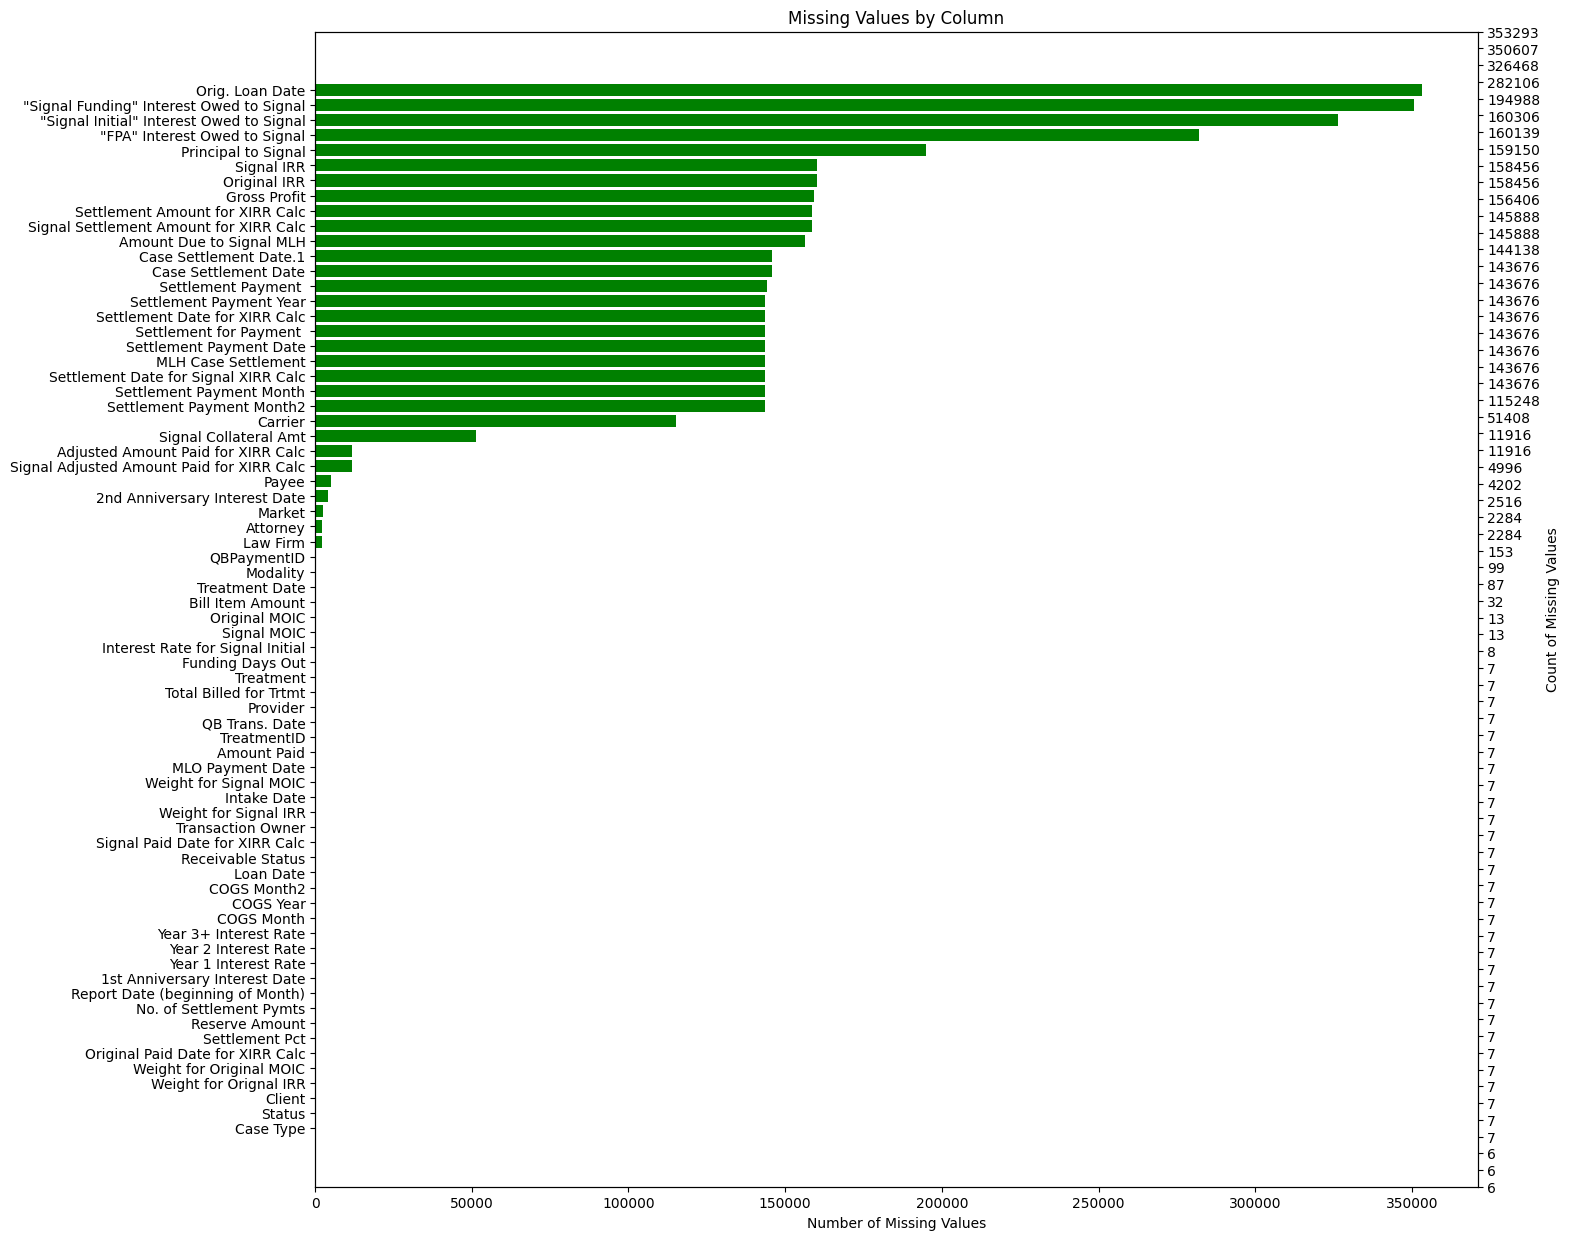

In [20]:
import missingno as msno

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values
missing_values.sort_values(inplace=True)

# Bar plot of missing values with counts
fig, ax = plt.subplots(figsize=(15, 15))

# Primary y-axis for column names
ax.barh(missing_values.index, missing_values.values, color='green')
ax.set_xlabel('Number of Missing Values')
ax.set_title('Missing Values by Column')

# Secondary y-axis for counts
ax2 = ax.twinx()
ax2.set_yticks(ax.get_yticks())
ax2.set_yticklabels(missing_values.values)
ax2.set_ylabel('Count of Missing Values')

plt.show()

In [21]:
df.isnull().sum()

Case Type                                         6
Status                                            6
Attorney                                       2284
Law Firm                                       2284
Client                                            6
Carrier                                      115248
Market                                         2516
Intake Date                                       7
Case Settlement Date                         145888
MLO Payment Date                                  7
QBPaymentID                                     153
QB Trans. Date                                    7
TreatmentID                                       7
Treatment                                         7
Treatment Date                                   87
Provider                                          7
Total Billed for Trtmt                            7
Bill Item Amount                                 32
Transaction Owner                                 7
Amount Paid 

In [22]:
cols_with_nan = ['Orig. Loan Date', 'Principal to Signal','"FPA" Interest Owed to Signal',
                '"Signal Initial" Interest Owed to Signal', '"Signal Funding" Interest Owed to Signal'
                ]

df = df.drop(columns = cols_with_nan)

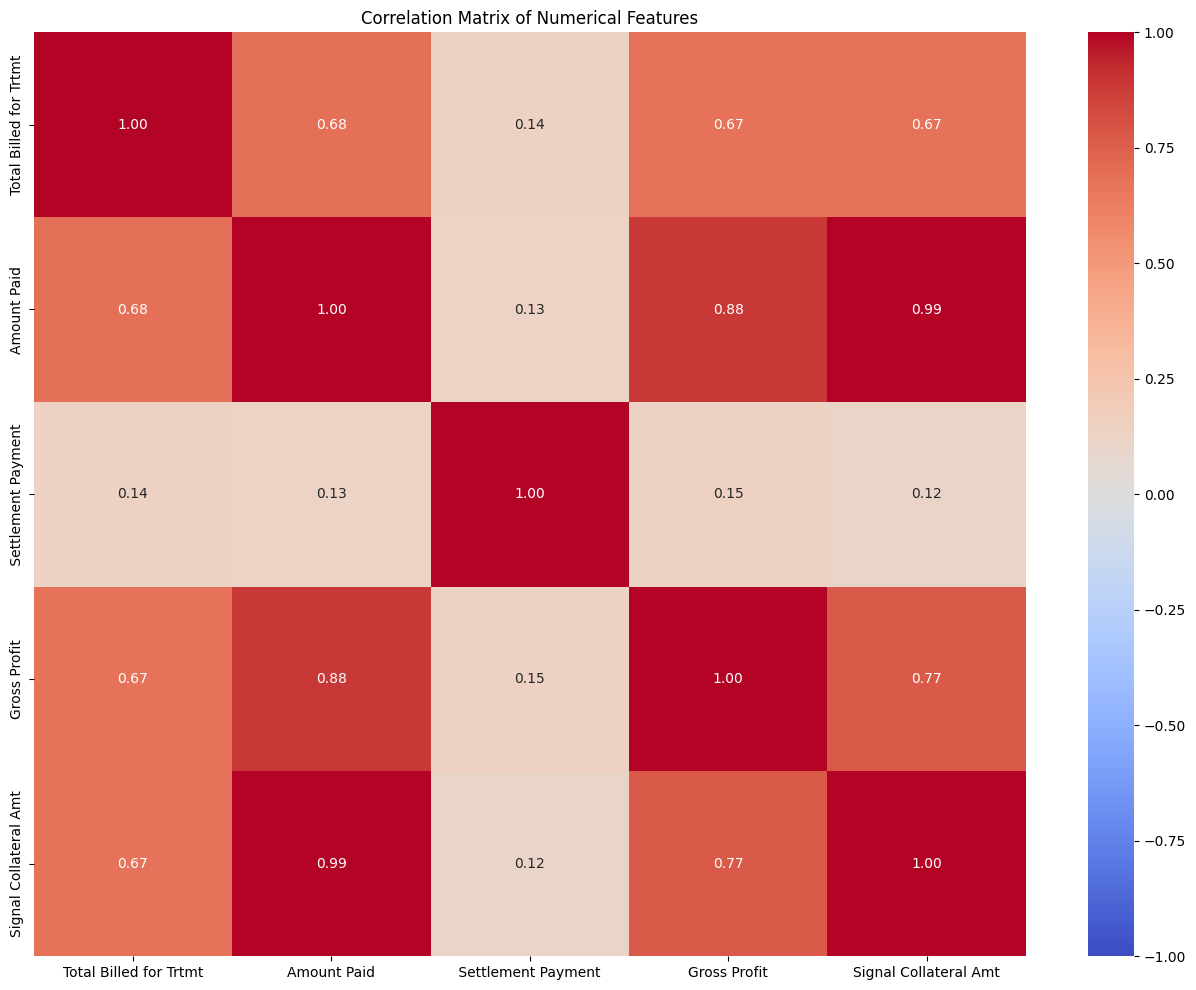

In [23]:
# List of numerical columns to analyze
numerical_columns = [
    'Total Billed for Trtmt', 'Amount Paid', ' Settlement Payment ', 'Gross Profit','Signal Collateral Amt'
       ]

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [24]:
df_closed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211213 entries, 0 to 354881
Data columns (total 70 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   Case Type                                  211213 non-null  object        
 1   Status                                     211213 non-null  object        
 2   Attorney                                   211097 non-null  object        
 3   Law Firm                                   211097 non-null  object        
 4   Client                                     211213 non-null  object        
 5   Carrier                                    170267 non-null  object        
 6   Market                                     211097 non-null  object        
 7   Intake Date                                211213 non-null  datetime64[ns]
 8   Case Settlement Date                       208877 non-null  datetime64[ns]
 9   MLO 

In [25]:
categorical_values = df[['Case Type','Status','Carrier','Market','Law Firm','Receivable Status']]

categorical_values.head(5)

,Case Type,Status,Carrier,Market,Law Firm,Receivable Status
0,Core,Closed-Settled,USAA,Florida,Brannon & Brannon,Settled
1,Core,Active-Pending Settlement,CNA,Atlanta,"Spaulding Law, LLC",Active
2,Core,Active-Pending Settlement,CNA,Atlanta,"Spaulding Law, LLC",Active
3,Core,Active-Pending Settlement,CNA,Atlanta,"Spaulding Law, LLC",Active
4,Core,Active-Pending Settlement,CNA,Atlanta,"Spaulding Law, LLC",Active


In [26]:
import scipy.stats as ss
from scipy.stats import chi2_contingency

In [27]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [28]:
rows= []

for var1 in categorical_values:
  col = []
  for var2 in categorical_values :
    cramers =cramers_V(categorical_values[var1], categorical_values[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_cramer = pd.DataFrame(cramers_results, columns = categorical_values.columns, index =categorical_values.columns)

In [29]:
df_cramer

,Case Type,Status,Carrier,Market,Law Firm,Receivable Status
Case Type,1.00,0.03,0.15,0.14,0.34,0.22
Status,0.03,1.00,0.30,0.02,0.28,0.97
Carrier,0.15,0.30,1.00,0.33,0.23,0.35
Market,0.14,0.02,0.33,1.00,0.73,0.18
Law Firm,0.34,0.28,0.23,0.73,1.00,0.46
Receivable Status,0.22,0.97,0.35,0.18,0.46,1.00


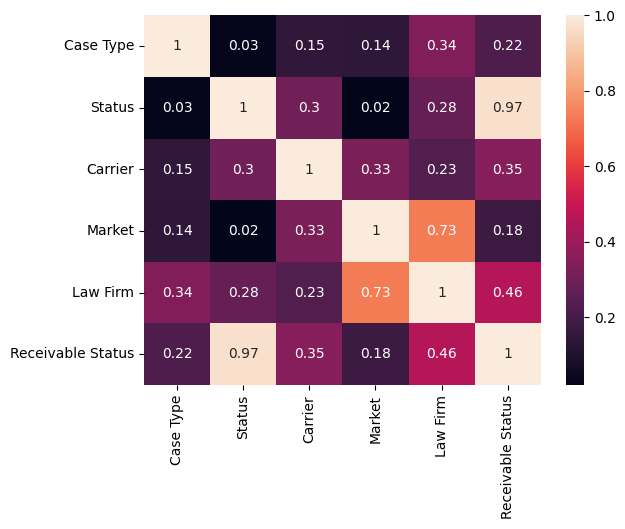

In [30]:
# generating 2-D 10x10 matrix of random numbers
# from 1 to 100
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
  
# setting the parameter values
annot = True
  
# plotting the heatmap
hm = sns.heatmap(data=df_cramer,
                annot=annot)
  
# displaying the plotted heatmap
plt.show()

In [31]:
df_market = df[df['Market'].isin(['Atlanta', 'California'])]

df_market.dropna()

df_market.shape

(274029, 65)

In [32]:
c_tab = pd.crosstab(index=[df_market['Market'], df_market['Case Type']], 
                    columns=df_market['Receivable Status'], 
                    margins=False, 
                    dropna=False)
c_tab = c_tab.fillna(0).astype(int)
c_tab



Receivable Status                                       Active  Settled
Market     Case Type                                                   
Atlanta    Apex                                              0        0
           Apex Spine & Neuro                                3        0
           Atlanta Spine                                    10        3
           BKP Medical                                       0        0
           Bay Area Injury                                   0        0
           Beverly Hills Surgical Institute-DO NOT USE       0        0
           Beverly Hills Surgical Institute-NEW              0        0
           Bridge Medical                                    0        0
           CA Only                                         350      352
           Century Endoscopy                                 0        0
           Century Park                                      0        0
           Century Plaza                                     0        0
           Chiro NSH Converted                               1        1
           Converted NSH                                    15       48
           Core                                          24165    89765
           Culver City                                       0        0
           Dr. Lo – California                               0        0
           Fresno Converted                                  0        0
           ImageLink                                        79      118
           Imaging  - Medquest                               0        1
           Imaging - Central Valley                          0        0
           Imaging - ImageSouth                              5        1
           Imaging - Valley MRI                              1        0
           Imaging Fresno                                    0        0
           Imaging NSH                                       6       13
           POC - Converted                                  79       50
           POC - June 2022 AR                             1740      753
           POC - PL                                       5986     1108
           Pre-Surgery                                     497      931
           Sante Surgery Center                              0        0
           Surgical                                      10539    38753
California Apex                                             16        5
           Apex Spine & Neuro                                0        0
           Atlanta Spine                                     1        0
           BKP Medical                                   42220     6319
           Bay Area Injury                                3623     1835
           Beverly Hills Surgical Institute-DO NOT USE     428       70
           Beverly Hills Surgical Institute-NEW             74       10
           Bridge Medical                                 2814      785
           CA Only                                          30        3
           Century Endoscopy                               137       26
           Century Park                                    166       62
           Century Plaza                                   217       43
           Chiro NSH Converted                               0        0
           Converted NSH                                     6        0
           Core                                           3184     1993
           Culver City                                       5        1
           Dr. Lo – California                           13142    18246
           Fresno Converted                                228       98
           ImageLink                                         0        0
           Imaging  - Medquest                               0        0
           Imaging - Central Valley                         20        6
           Imaging - ImageSouth                              0        0
           Imaging - Valley MRI         

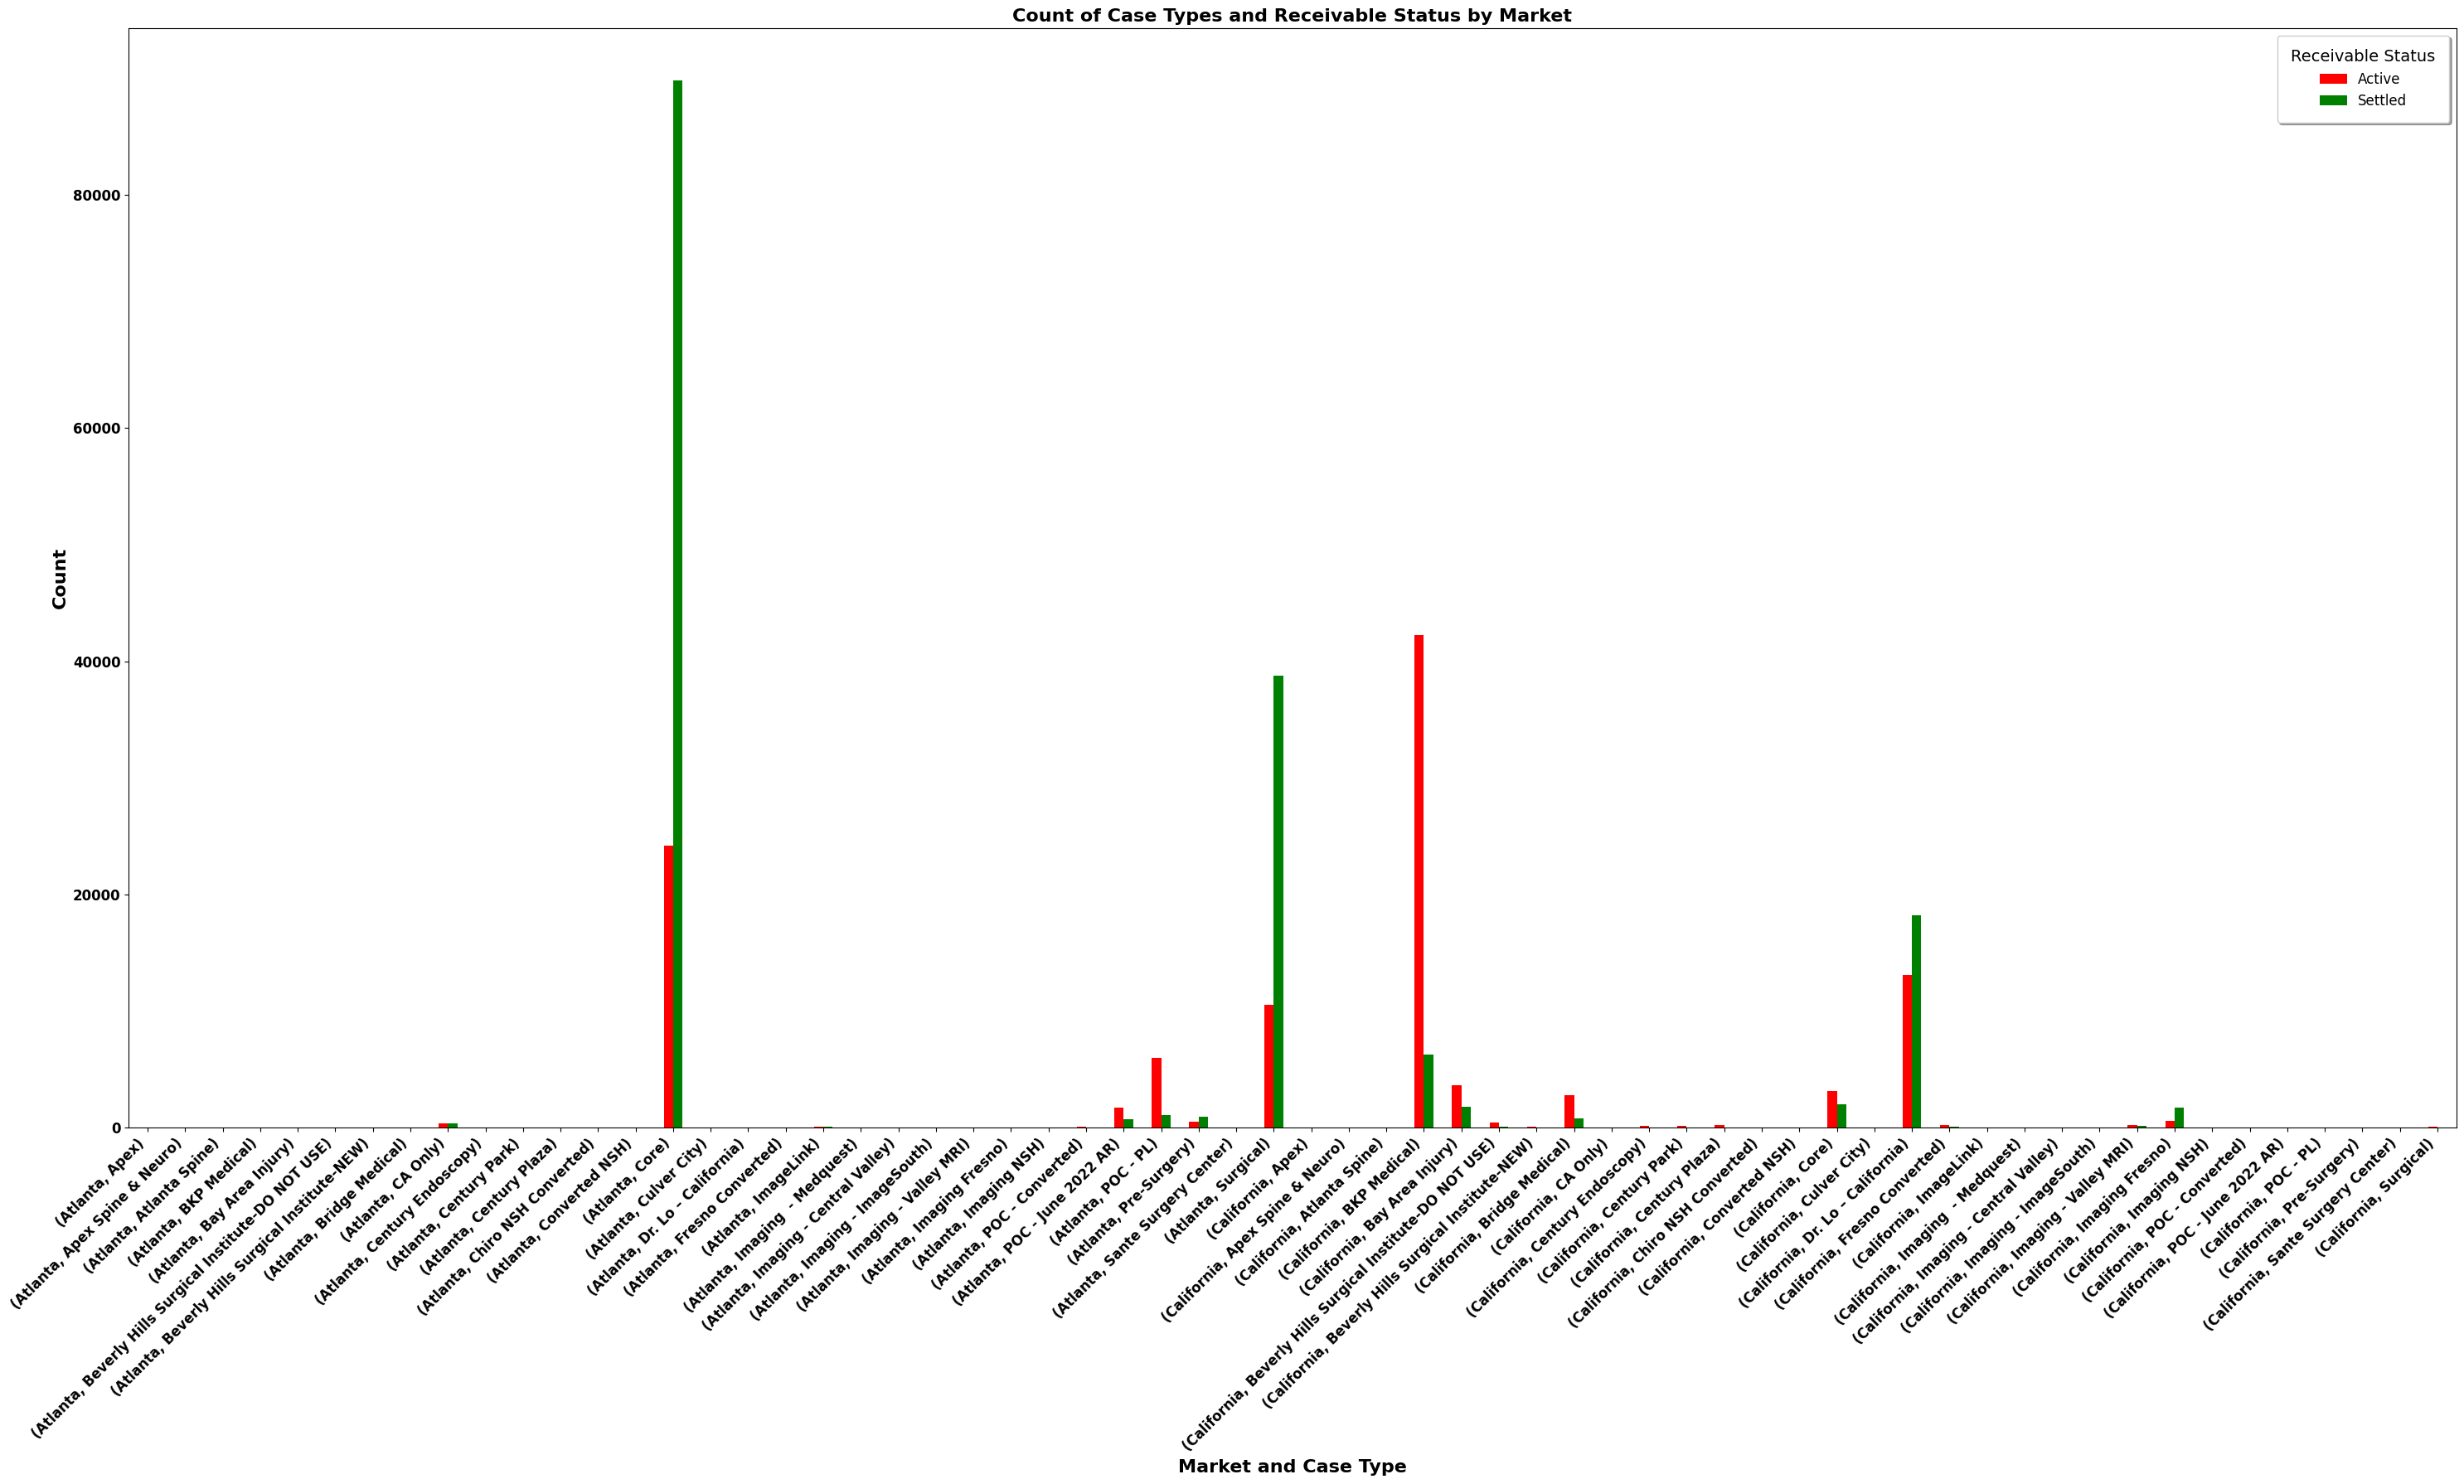

In [33]:
colors = ['red', 'green']

# Plot the data
ax = c_tab.plot(kind='bar', figsize=(30, 18), color=colors)

# Customize the plot
plt.title('Count of Case Types and Receivable Status by Market', fontsize=16, fontweight='bold')
plt.xlabel('Market and Case Type', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(title='Receivable Status', fontsize=12, title_fontsize=14, frameon=True, framealpha=1, shadow=True, borderpad=1)

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
market_car_variables = df_market[['Case Type','Status','Carrier','Market','Law Firm','Receivable Status']]

market_car_variables.head(5)

,Case Type,Status,Carrier,Market,Law Firm,Receivable Status
1,Core,Active-Pending Settlement,CNA,Atlanta,"Spaulding Law, LLC",Active
2,Core,Active-Pending Settlement,CNA,Atlanta,"Spaulding Law, LLC",Active
3,Core,Active-Pending Settlement,CNA,Atlanta,"Spaulding Law, LLC",Active
4,Core,Active-Pending Settlement,CNA,Atlanta,"Spaulding Law, LLC",Active
5,Core,Active-Pending Settlement,CNA,Atlanta,"Spaulding Law, LLC",Active


In [35]:
rows= []

for var1 in market_car_variables:
  col = []
  for var2 in market_car_variables :
    cramers =cramers_V(market_car_variables[var1], market_car_variables[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_market_cramer = pd.DataFrame(cramers_results, columns = market_car_variables.columns, index =market_car_variables.columns)

In [36]:
df_market_cramer

,Case Type,Status,Carrier,Market,Law Firm,Receivable Status
Case Type,1.00,0.03,0.16,0.92,0.33,0.28
Status,0.03,1.00,0.30,0.29,0.28,0.98
Carrier,0.16,0.30,1.00,0.33,0.22,0.37
Market,0.92,0.29,0.33,1.00,0.99,0.18
Law Firm,0.33,0.28,0.22,0.99,1.00,0.48
Receivable Status,0.28,0.98,0.37,0.18,0.48,1.00


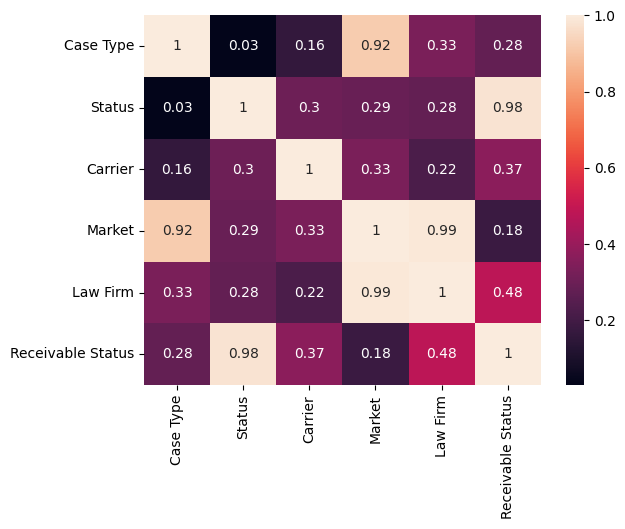

In [37]:
# generating 2-D 10x10 matrix of random numbers
# from 1 to 100
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
  
# setting the parameter values
annot = True
  
# plotting the heatmap
hm = sns.heatmap(data=df_market_cramer,
                annot=annot)
  
# displaying the plotted heatmap
plt.show()

In [38]:
# Separate DataFrames for Atlanta and California
df_atlanta = df[df['Market'] == 'Atlanta']
df_california = df[df['Market'] == 'California']

# Create crosstabs for Atlanta and California separately
c_tab_atlanta = pd.crosstab(index=[df_atlanta['Law Firm']], 
                            columns=df_atlanta['Receivable Status'], 
                            margins=False, 
                            dropna=False)
c_tab_california = pd.crosstab(index=[df_california['Law Firm']], 
                               columns=df_california['Receivable Status'], 
                               margins=False, 
                               dropna=False)

# Fill NaN values with zero and change dtype to int
c_tab_atlanta = c_tab_atlanta.fillna(0).astype(int)
c_tab_california = c_tab_california.fillna(0).astype(int)

c_tab_atlanta = c_tab_atlanta.loc[(c_tab_atlanta != 0).any(axis=1)]
c_tab_california = c_tab_california.loc[(c_tab_california != 0).any(axis=1)]



In [39]:
# Create crosstabs to calculate total cases (active + settled) for each law firm
crosstab_atlanta = pd.crosstab(index=df_atlanta['Law Firm'], columns=df_atlanta['Receivable Status'])
crosstab_california = pd.crosstab(index=df_california['Law Firm'], columns=df_california['Receivable Status'])

# Calculate total cases for each law firm
crosstab_atlanta['Total Cases'] = crosstab_atlanta.sum(axis=1)
crosstab_california['Total Cases'] = crosstab_california.sum(axis=1)

# Filter top performing firms in Atlanta
top_firms_atlanta = crosstab_atlanta[
    (crosstab_atlanta['Active'] == 0) & 
    (crosstab_atlanta['Settled'] > 0) & 
    (crosstab_atlanta['Total Cases'] >= 10)
].sort_values(by='Total Cases', ascending=False).head(10)

# Filter top performing firms in California
top_firms_california = crosstab_california[
    (crosstab_california['Active'] == 0) & 
    (crosstab_california['Settled'] > 0) & 
    (crosstab_california['Total Cases'] >= 10)
].sort_values(by='Total Cases', ascending=False).head(10)

print("Top Performing Firms in Atlanta:")
print(top_firms_atlanta)

print("\nTop Performing Firms in California:")
print(top_firms_california)

Top Performing Firms in Atlanta:
Receivable Status         Active  Settled  Total Cases
Law Firm                                              
Brodhead Law, LLC              0     1723         1723
Yates Law Group                0     1568         1568
Hasty Pope                     0      683          683
Law Firm of Lloyd Thomas       0      674          674
MG Law                         0      616          616
DelCampo & Grayson LLC         0      608          608
Marks Law Group                0      606          606
Rohan Law, PC                  0      563          563
The Tidwell Firm, LLC          0      542          542
Tom Holbird, PC                0      509          509

Top Performing Firms in California:
Receivable Status                           Active  Settled  Total Cases
Law Firm                                                                
BK - JEFFREY FLEITMAN ESQ                        0      134          134
Law Office of Eric Escamilla                     0 

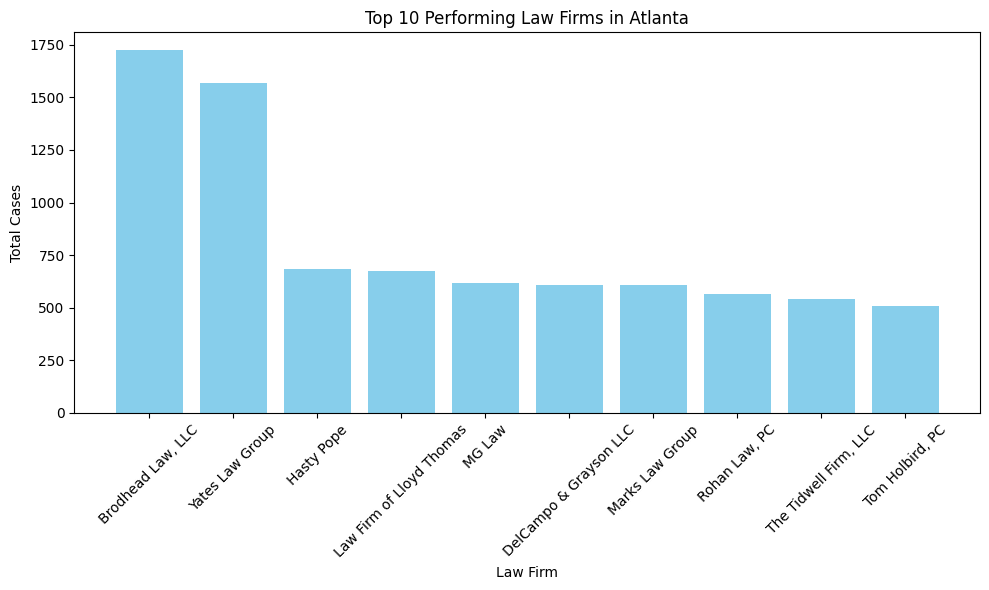

In [40]:
# Plotting the bar plot for Atlanta
plt.figure(figsize=(10, 6))
plt.bar(top_firms_atlanta.index, top_firms_atlanta['Total Cases'], color='skyblue')
plt.title('Top 10 Performing Law Firms in Atlanta')
plt.xlabel('Law Firm')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

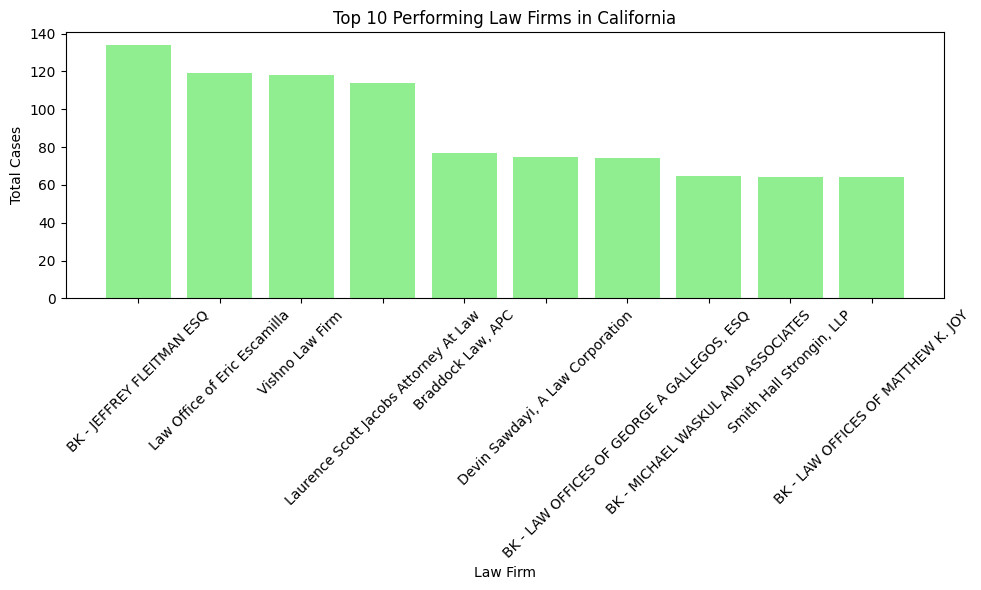

In [41]:
# Plotting the bar plot for California
plt.figure(figsize=(10, 6))
plt.bar(top_firms_california.index, top_firms_california['Total Cases'], color='lightgreen')
plt.title('Top 10 Performing Law Firms in California')
plt.xlabel('Law Firm')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354889 entries, 0 to 354888
Data columns (total 65 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   Case Type                                  354883 non-null  object        
 1   Status                                     354883 non-null  object        
 2   Attorney                                   352605 non-null  object        
 3   Law Firm                                   352605 non-null  object        
 4   Client                                     354883 non-null  object        
 5   Carrier                                    239641 non-null  object        
 6   Market                                     352373 non-null  object        
 7   Intake Date                                354882 non-null  datetime64[ns]
 8   Case Settlement Date                       209001 non-null  datetime64[ns]
 9   MLO 

In [49]:
# Calculate the difference in days and create a new column
df_closed['Days Taken to Close'] = (df_closed['Case Settlement Date'] - df_closed['Intake Date']).dt.days

# Display the updated DataFrame
print(df_closed[['Intake Date', 'Case Settlement Date', 'Days Taken to Close']].head(50))

   Intake Date Case Settlement Date  Days Taken to Close
0   2015-12-03           2015-06-27               -159.0
15  2017-02-21           2017-11-09                261.0
16  2017-02-21           2017-11-09                261.0
17  2017-02-21           2017-11-09                261.0
18  2017-02-21           2017-11-09                261.0
19  2015-03-03           2016-11-28                636.0
20  2015-03-03           2016-11-28                636.0
22  2020-09-03           2022-02-11                526.0
23  2020-09-03           2022-02-11                526.0
24  2020-09-03           2022-02-11                526.0
25  2020-09-03           2022-02-11                526.0
26  2020-09-03           2022-02-11                526.0
27  2020-09-03           2022-02-11                526.0
28  2020-09-03           2022-02-11                526.0
29  2020-09-03           2022-02-11                526.0
30  2008-05-11           2009-04-15                339.0
31  2008-05-11           2009-0

C:\Users\rajan\AppData\Local\Temp\ipykernel_8868\398448857.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_closed[column].dropna(), shade=True)


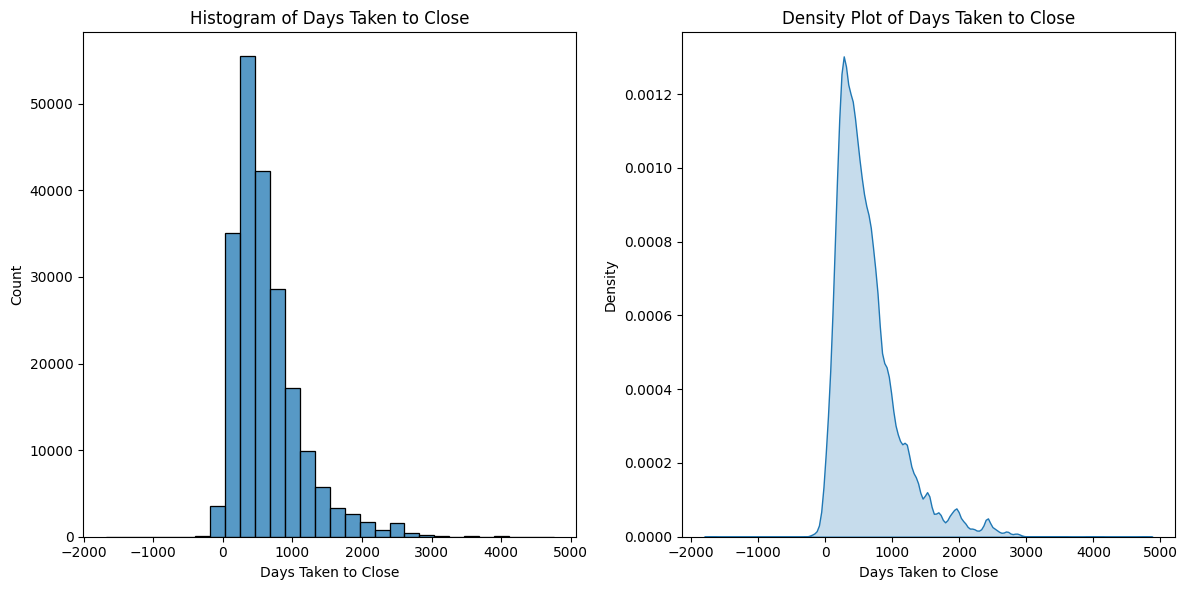

In [53]:
numerical_columns = ['Days Taken to Close']

def plot_distribution(columns):
    for column in columns:
        plt.figure(figsize=(12, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_closed[column].dropna(), bins=30, kde=False)
        plt.title(f'Histogram of {column}')
        
        # Density Plot
        plt.subplot(1, 2, 2)
        sns.kdeplot(df_closed[column].dropna(), shade=True)
        plt.title(f'Density Plot of {column}')
        
        plt.tight_layout()
        plt.show()

# Plot distributions
plot_distribution(numerical_columns)


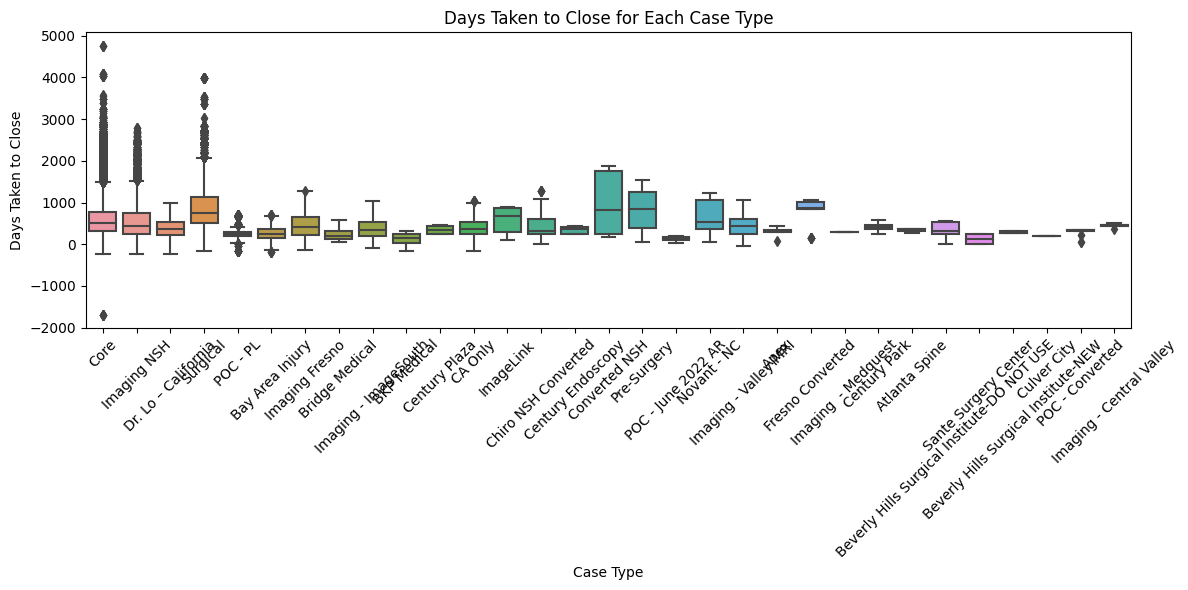

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Case Type', y='Days Taken to Close', data=df_closed)
plt.title('Days Taken to Close for Each Case Type')
plt.xlabel('Case Type')
plt.ylabel('Days Taken to Close')
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

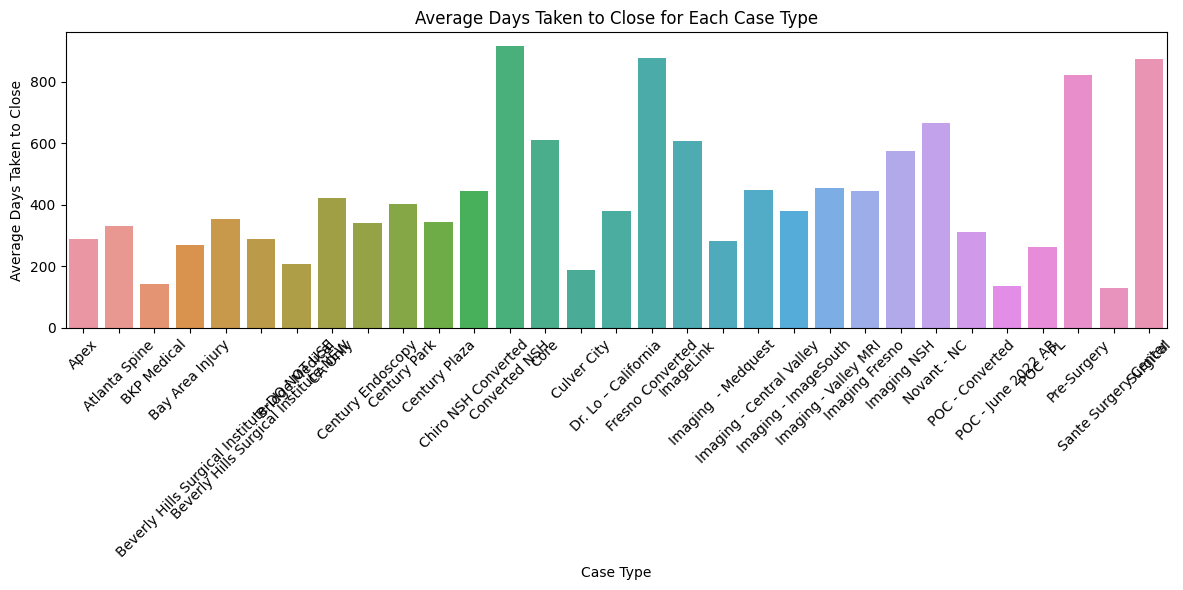

In [57]:
# Handling missing values by dropping rows with NaNs in the date columns
df_closed = df_closed.dropna(subset=['Intake Date', 'Case Settlement Date', 'Case Type'])

# Calculate the average days taken to close for each case type
avg_days = df_closed.groupby('Case Type')['Days Taken to Close'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Case Type', y='Days Taken to Close', data=avg_days)
plt.title('Average Days Taken to Close for Each Case Type')
plt.xlabel('Case Type')
plt.ylabel('Average Days Taken to Close')
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()